### The Curse of Dimensionality

In [1]:
###### Define Numerical Python environment

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
np.linspace(1,4,10)

array([1.        , 1.33333333, 1.66666667, 2.        , 2.33333333,
       2.66666667, 3.        , 3.33333333, 3.66666667, 4.        ])

In [3]:
np.logspace(1,4,10)

array([   10.        ,    21.5443469 ,    46.41588834,   100.        ,
         215.443469  ,   464.15888336,  1000.        ,  2154.43469003,
        4641.58883361, 10000.        ])

In [4]:
###### Define `datasets` of varying size using `make_classification`

from sklearn.datasets import make_classification

n_vals = np.logspace(1, 4, 20)

datasets = { 
    int(n): make_classification(int(n)) 
    for n in n_vals
}

In [5]:
def return_two_things():
    return 1, 2

In [6]:
t = return_two_things()
t

(1, 2)

In [7]:
%whos 

Variable              Type        Data/Info
-------------------------------------------
datasets              dict        n=20
make_classification   function    <function make_classification at 0x1a1596ba60>
n_vals                ndarray     20: 20 elems, type `float64`, 160 bytes
np                    module      <module 'numpy' from '/an<...>kages/numpy/__init__.py'>
pd                    module      <module 'pandas' from '/a<...>ages/pandas/__init__.py'>
plt                   module      <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>
return_two_things     function    <function return_two_things at 0x1a1597d400>
t                     tuple       n=2


In [8]:
###### Load models from Scikit-Learn

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [9]:
###### Define dictionary of models

models = {
    'knn' : KNeighborsClassifier(),
    'lr' : LogisticRegression(),
    'dt' : DecisionTreeClassifier(),
    'svm' : SVC(),
}

In [10]:
###### import `time` library

from time import time

https://stackoverflow.com/questions/2322355/proper-name-for-python-operator

In [11]:
###### Define functions to time fit and prediction

def time_fit(data, model):
    start = time()
    model.fit(*data)
    fit_time = time() - start
    return fit_time

def time_predict(data, model):
    start = time()
    model.predict(data[0])
    predict_time = time() - start
    return predict_time

In [12]:
###### Define function to test all models on a dataset of size $n$

def fit_predict_model_on_n(model_name, n):
    
    model = models[model_name]
    dataset = datasets[n]
    
    fit_time = time_fit(dataset, model)
    
    predict_time = time_predict(dataset, model)
    
    return {
        'model_name' : model_name,
        'n' : n,
        'fit_time' : fit_time,
        'predict_time' : predict_time
    }

In [13]:
###### Run all models against all datasets 

results = []
for n in datasets.keys():
    for model in models.keys():
        results.append(fit_predict_model_on_n(model, n))

In [14]:
###### Run all models against all datasets as a list comprehension

results = [
    fit_predict_model_on_n(model, n)
    for n in datasets.keys()
    for model in models.keys()
]

In [15]:
###### Collect results in a `DataFrame`

results_df = pd.DataFrame(results)

In [16]:
###### Display a sample of the results

results_df.sample(5)

,fit_time,model_name,n,predict_time
56,0.002162,knn,1623,0.100492
12,0.000523,knn,29,0.000788
28,0.000363,knn,127,0.002139
74,0.161152,dt,6951,0.000792
59,0.045532,svm,1623,0.027541


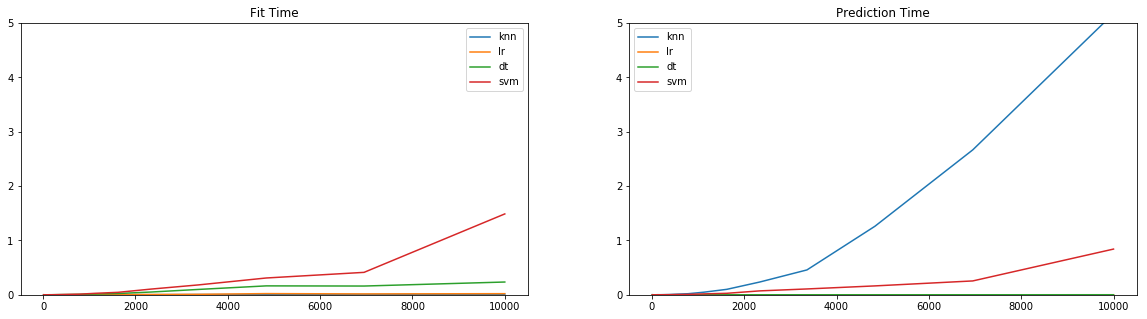

In [17]:
###### Plot Fit Time and Prediction Time

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,5))

for model_name in results_df.model_name.unique():
    
    model_mask = (results_df.model_name == model_name)
    model_results_df = results_df[model_mask]

    ax1.set_title('Fit Time')
    ax1.plot(model_results_df.n, 
             model_results_df.fit_time, 
             label=model_name)
    ax1.set_ylim((0,5))
    ax1.legend()
    
    ax2.set_title('Prediction Time')
    ax2.set_ylim((0, 5))
    ax2.plot(model_results_df.n, 
             model_results_df.predict_time, 
             label=model_name)
    ax2.legend()
    
plt.show()    

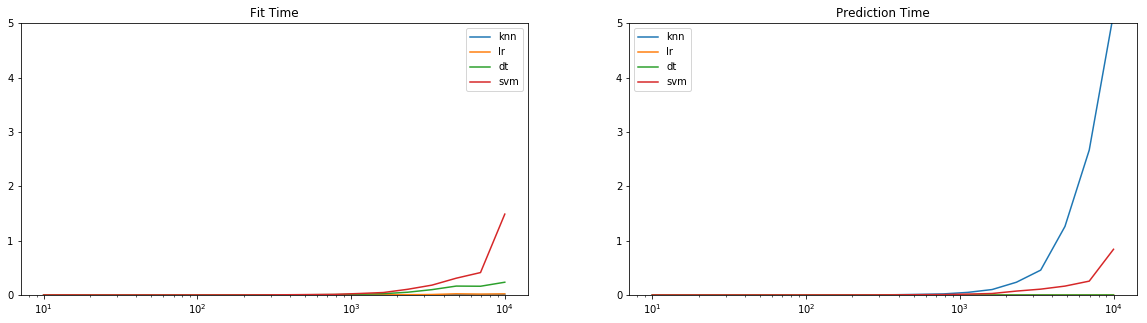

In [18]:
###### Plot Fit Time and Prediction Time with Logarithmic Scale for $n$

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,5))

for model_name in results_df.model_name.unique():
    
    model_mask = (results_df.model_name == model_name)
    model_results_df = results_df[model_mask]
    
    ax1.set_title('Fit Time')
    ax1.plot(model_results_df.n, 
             model_results_df.fit_time, 
             label=model_name)
    ax1.set_xscale('log')
    ax1.set_ylim((0, 5))
    ax1.legend()
    
    ax2.set_title('Prediction Time')
    ax2.plot(model_results_df.n, 
             model_results_df.predict_time, 
             label=model_name)
    ax2.set_xscale('log')
    ax2.set_ylim((0, 5))
    ax2.legend()

plt.show()    